<a href="https://colab.research.google.com/github/dssalazarp/SenalesSistemas/blob/master/Parcial_1_Se%C3%B1ales_y_Sistemas_David_Santiago_Salazar_Pineda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# simulacion del punto 2.B
 con frecuencia igual a 5 hhz

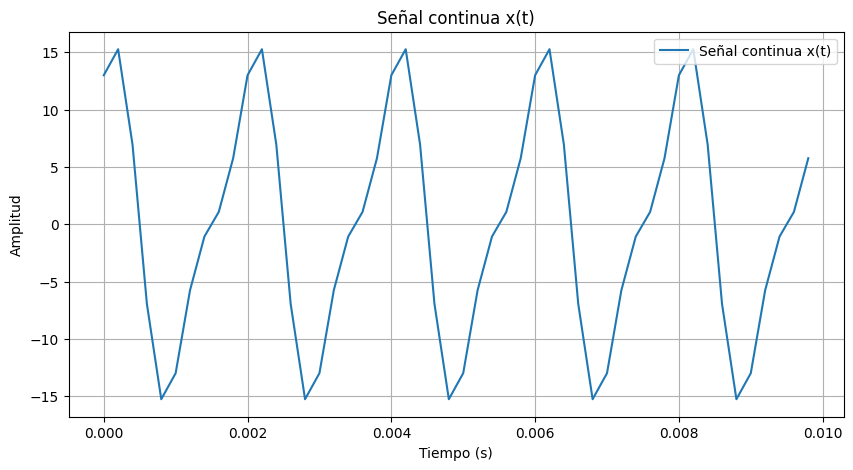

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# señal continua x(t)
def x(t):
    return 3 * np.cos(1000 * np.pi * t) + 5 * np.sin(2000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t)

# frecuencia de muestreo
fs = 5000  # Hz

# duracion de la señal continua
T = 0.01  # segundos

# numero de muestras
num_samples = int(fs * T)

# vector de tiempo continuo
t = np.linspace(0, T, num_samples, endpoint=False)

# vector de la señal continua
signal_continuous = x(t)

# grafico de la señal continua
plt.figure(figsize=(10, 5))
plt.plot(t, signal_continuous, label='Señal continua x(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal continua x(t)')
plt.grid(True)
plt.legend()
plt.show()


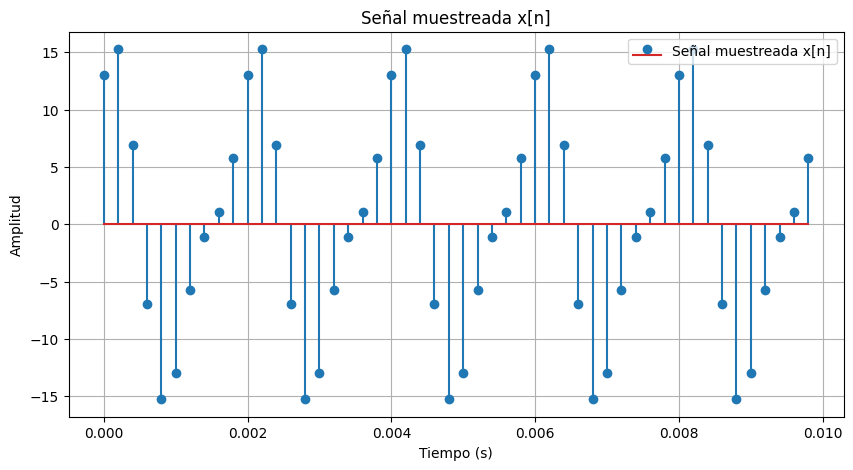

In [ ]:
# muestreo de la señal continua
signal_sampled = x(np.arange(0, T, 1/fs))

# grafico de la señal muestreada
plt.figure(figsize=(10, 5))
plt.stem(np.arange(0, T, 1/fs), signal_sampled, label='Señal muestreada x[n]')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal muestreada x[n]')
plt.grid(True)
plt.legend()
plt.show()

observamos que no cumple con la relacion de nyquist la cual dice que la relacion de la frecuencia de sampleo o muestreo debe ser mayor o igual a dos veces la frecuencia maxima, por ese se propone la  siguiente relacion la cual cumple con la relacion de nyquist.

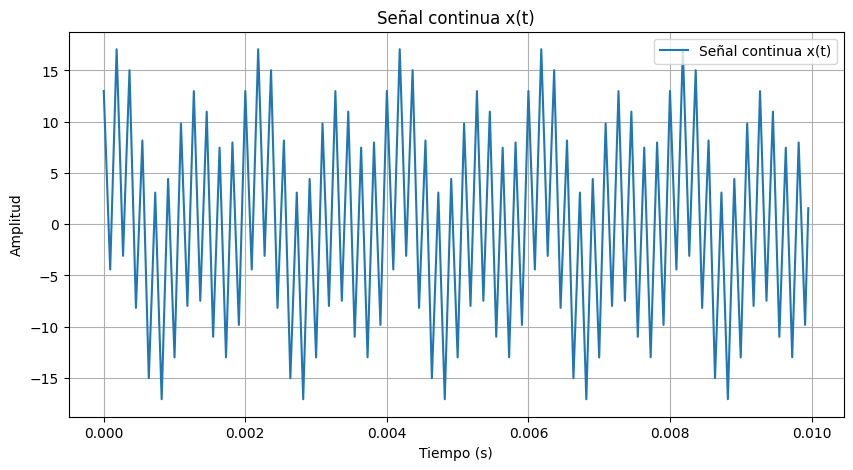

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# señal continua x(t)
def x(t):
    return 3 * np.cos(1000 * np.pi * t) + 5 * np.sin(2000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t)

# frecuencias de las señales
F1=1000
F2=2000
F3=11000
# frecuencia maxima de las señales
fm =max(F1,F2,F3)

# frecuencia de muestreo cumpliendo con nyquist
fs = fm*2  # Hz

# duracion de la señal continua
T = 0.01  # segundos

# numero de muestras
num_samples = int(fs * T)

# vector de tiempo continuo
t = np.linspace(0, T, num_samples, endpoint=False)

# vector de la señal continua
signal_continuous = x(t)

# grafico de la señal continua
plt.figure(figsize=(10, 5))
plt.plot(t, signal_continuous, label='Señal continua x(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal continua x(t)')
plt.grid(True)
plt.legend()
plt.show()



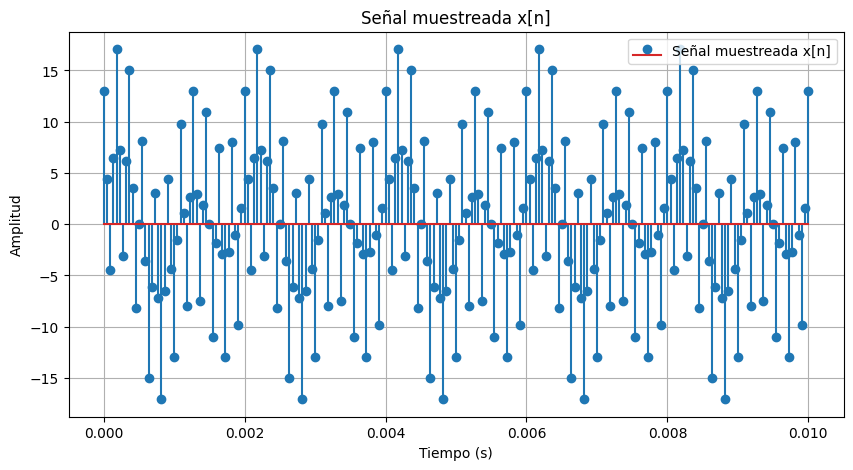

In [ ]:
# muestreo de la señal continua
signal_sampled = x(np.arange(0, T, 1/fs))

# grafico de la señal muestreada
plt.figure(figsize=(10, 5))
plt.stem(np.arange(0, T, 1/fs), signal_sampled, label='Señal muestreada x[n]')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal muestreada x[n]')
plt.grid(True)
plt.legend()
plt.show()

#simulacion del punto 2.C

<ipython-input-22-3375c74756a7>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1, 1), ve))]


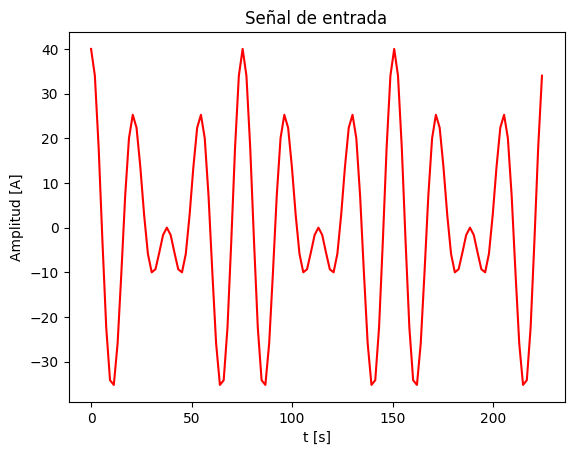

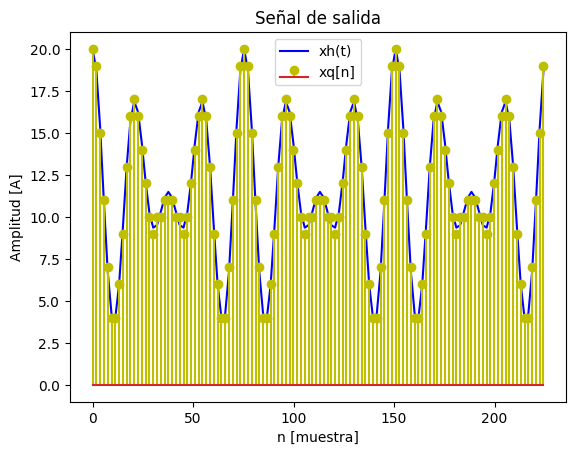

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# funcion para aplicar cero y pendiente
def my_ceropend(x, xhmax=20, xhmin=4):
    m = (xhmax - xhmin) / (x.max() - x.min()) # calculo de la pendiente
    b = xhmin - m * x.min() # calculo del cero
    xh = m * x + b # aplicacion cero y pendiente
    return xh

#  parametros de la señal
T1 = 6 * np.pi # periodo de la señal 1
T2 = 8 * np.pi # periodo de la señal 2
F1 = 1 / T1 # frecuencia de la señal 1
F2 = 1 / T2 # frecuencia de la señal 2
T = 24 * np.pi # periodo cuasiperiodico
Fs = 10 * max(F1, F2)#frecuencia de muestreo cumpliendo nyquist
t = np.arange(0, 3 * T, 1 / Fs)# vector de tiempo para 3 periodos

# señal de entrada
x = 20 * (np.cos(t / 3) + np.cos(t / 4))

# limites de la señal de salida
xhmax = 20 # limite superior de la señal de salida
xhmin = 4 # limite inferior de la señal de salida
# Aplicacion de cero y pendiente para la señal de entrada
xh = my_ceropend(x, xhmax, xhmin).reshape(-1, 1)

# Cuantizar la señal de salida
nbits = 4 # numero de bits
Ne = 2 ** nbits # cantidad de estados
res = (xhmax - xhmin) / Ne # resolucion de cuantizacion
ve = np.arange(xhmin, xhmax + res, res).reshape(-1, 1)# Vector de estados
xq = np.zeros(len(xh))# inicializar la señal cuantizada
for i in range(len(xh)):# recorrer la señal cero y pendiente para Cuantizar la señal
    xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1, 1), ve))]

#Graficas de las funciones

# grafica de la  señal de entrada
plt.plot(t, x, 'r', label='x(t)')# señal de entrada
plt.xlabel('t [s]')# nombre del eje x
plt.ylabel('Amplitud [A]')# nombre del eje y
plt.title('Señal de entrada')# nombre de la Grafica
plt.show()
# grafica de la señal  de salida
plt.plot(t, xh, 'b', label='xh(t)')# señal de salida cero y pendiente
plt.stem(t, xq, 'y', label='xq[n]')# señal de salida cuantizada
plt.xlabel('n [muestra]')# nombre del eje x
plt.ylabel('Amplitud [A]') # nombre del eje y
plt.title('Señal de salida')# nombre de la Grafica
plt.legend()
plt.show()